In [1]:
from math import sqrt
from numpy import mean, std
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('evosuite-report/statistics.csv')


In [3]:
df

,configuration_id,TARGET_CLASS,criterion,Size,Length,MutationScore
0,Branch,com.sonos.services._1_1.Sonos,BRANCH,6,16,1.000000
1,Branch,com.sonos.services._1_1.CustomFault,BRANCH,4,8,1.000000
2,Branch,com.sonos.services._1.ReorderContainer,BRANCH,8,16,0.272727
3,Branch,com.sonos.services._1.ActionType,BRANCH,3,4,0.615385
4,Branch,com.sonos.services._1.AppLinkInfo,BRANCH,12,24,0.000000
...,...,...,...,...,...,...
363,Default,org.subsonic.restapi.ChatMessages,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,2,9,1.000000
364,Default,org.subsonic.restapi.JukeboxPlaylist,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,2,9,1.000000
365,Default,org.subsonic.restapi.Artist,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,16,48,0.888889
366,Default,org.subsonic.restapi.SimilarSongs2,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,2,9,1.000000


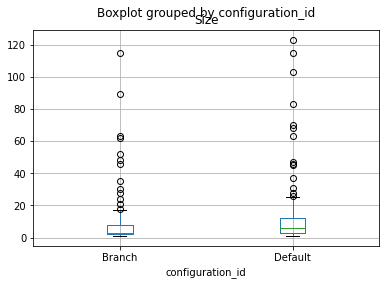

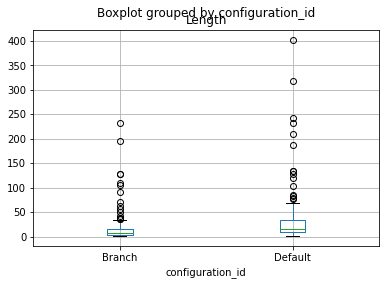

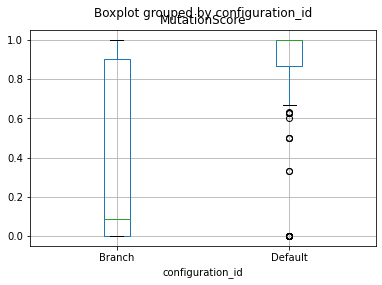

In [4]:
bp = df.boxplot(column='Size', by='configuration_id')
bp = df.boxplot(column='Length', by='configuration_id')
bp = df.boxplot(column='MutationScore', by='configuration_id')
plt.show()

In [5]:
df2 = pd.read_csv('evosuite-report/statistics_default.csv')

In [6]:
df2

,TARGET_CLASS,criterion,Coverage,Total_Goals,Covered_Goals
0,org.airsonic.player.io.PlayQueueInputStream,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.692819,254,144
1,org.airsonic.player.io.ShoutCastOutputStream,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.762413,291,185
2,org.airsonic.player.io.RangeOutputStream,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,1.000000,210,210
3,org.airsonic.player.io.TranscodeInputStream,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.213636,96,16
4,org.airsonic.player.io.InputStreamReaderThread,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.923077,59,51
...,...,...,...,...,...
270,org.subsonic.restapi.ChatMessages,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.937500,21,18
271,org.subsonic.restapi.JukeboxPlaylist,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.937500,21,18
272,org.subsonic.restapi.Artist,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.978611,119,115
273,org.subsonic.restapi.SimilarSongs2,LINE;BRANCH;EXCEPTION;WEAKMUTATION;OUTPUT;METH...,0.937500,21,18


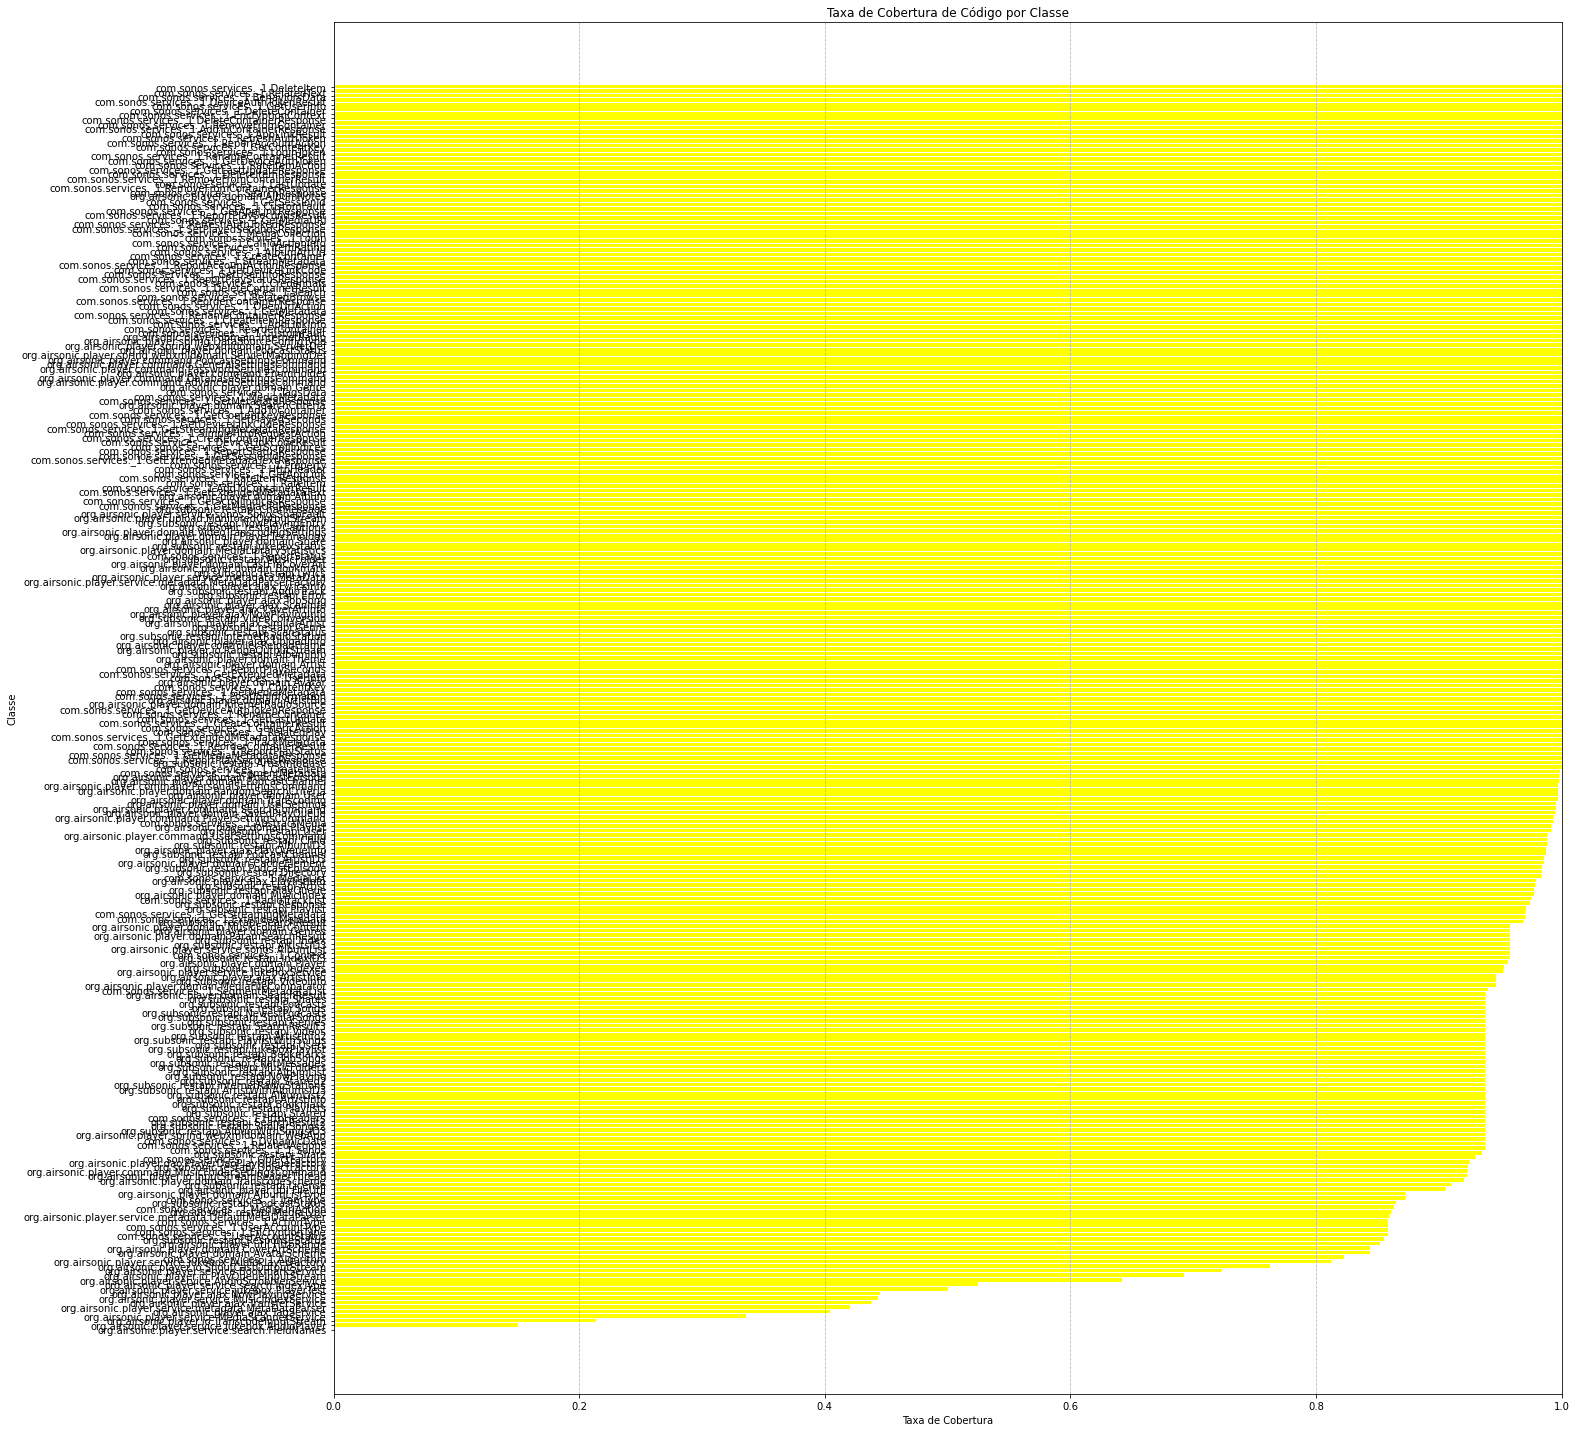

In [7]:
df3 = df2.sort_values(by='Coverage', ascending=True)
plt.figure(figsize=(22, 20))
plt.barh(df3['TARGET_CLASS'], df3['Coverage'], color='yellow')
plt.xlabel('Taxa de Cobertura')
plt.ylabel('Classe')
plt.title('Taxa de Cobertura de Código por Classe')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

In [8]:
percentual_cobertura = df2['Coverage'].mean() * 100
sum_total_goals = df2['Total_Goals'].sum()
sum_covered_goals = df2['Covered_Goals'].sum()
print("A cobertura total dos testes gerados pelo EvoSuite no projeto foi de %.2f%% " % percentual_cobertura)
print("A quantidade de Metas de Cobertura gerados pelo EvoSuite no projeto foi de: ", sum_total_goals)
print("A quatidade de Metas que foram de fato cobertas pelos testes gerados pelo EvoSuite no projeto foi de: ", sum_covered_goals)

A cobertura total dos testes gerados pelo EvoSuite no projeto foi de 94.66% 
A quantidade de Metas de Cobertura gerados pelo EvoSuite no projeto foi de:  31298
A quatidade de Metas que foram de fato cobertas pelos testes gerados pelo EvoSuite no projeto foi de:  28125


In [9]:
sum_total_goals = df2['Total_Goals'].sum()
sum_covered_goals = df2['Covered_Goals'].sum()

media_dict = {
    'Total_Metas_Cobertura': sum_total_goals,
    'Total_Metas_Cobertas': sum_covered_goals
}

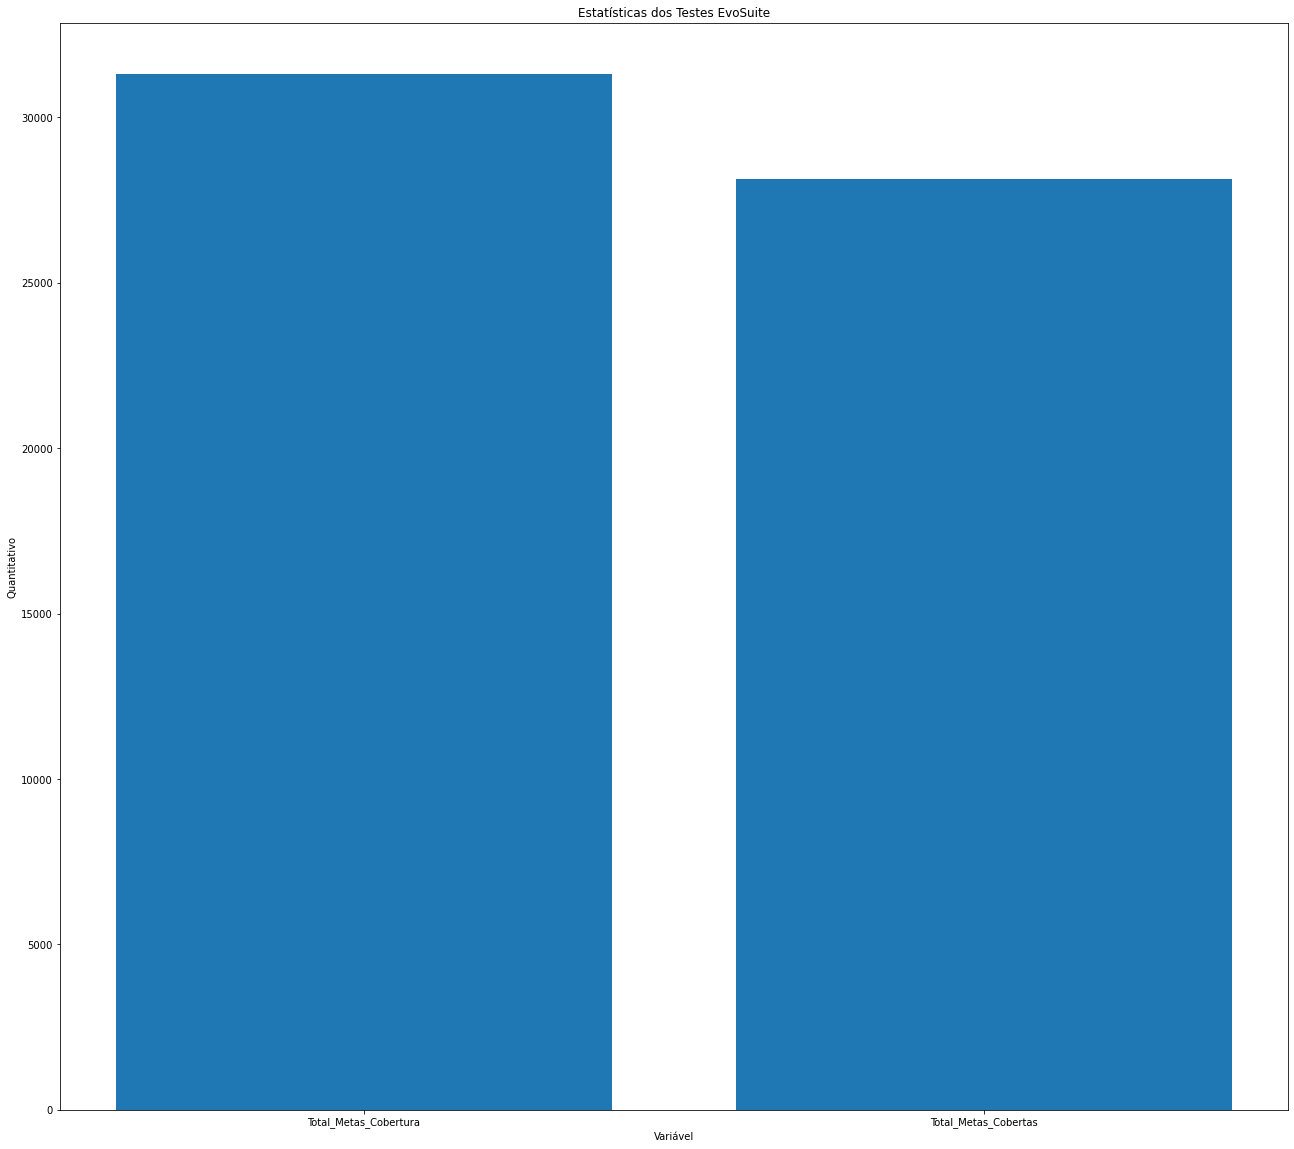

In [10]:
chaves = list(media_dict.keys())
valores = list(media_dict.values())
plt.figure(figsize=(22, 20))
plt.bar(chaves, valores)
plt.xlabel('Variável')
plt.ylabel('Quantitativo')
plt.title('Estatísticas dos Testes EvoSuite')
plt.show()